# Machine Learning Simple Regression Analysis: Housing Price Data Set

The most basic building block in machine learning is regression analysis. This notebook I discuss, with python demonstration, the procedure to carry out a machine learning project using regression analysis. I use Housing Price as an example and data set can be downloaded from [here](https://github.com/PacktPublishing/Hands-on-Python-for-Finance/tree/master/Chapter%207).

There are the following steps
- Environment Initiation. We first start by importing the packages we need for this project. Then we get data that is already saved in the data folder. Next we set up a model we want to study and we pull the variables from the data we uploaded.
- Machine Learning: Linear Regression. Regression analysis plays important role in finance and machine learning. Regression models (both linear and non-linear) are used to predict real values, ex. housing prices, salaries, or stock returns. I am going to discuss the fundamentals of simple regression analysis and we are going to use *sklearn* package to train a regression model in python notebook. Then I discuss the interpretations behind the coefficient and intercept term obtained from regression analysis and how these concepts apply in real life. 
- Machine Learning: Training and Testing. It is essential to understand the difference of the performance of machine on existing data and the performance of machine on potential future data. To carry out an unbiased and impartial learning process, it is important to separate training data and testing data so that the observations do not repeat and the performance is robust, consistent, and honest.
- Software Development / Product Management. Every data science project has two phases. Phase I is about end-to-end research and select the most optimal machine learning procedure. Phase II is about delivering a software product to consumer and clients so that the python codes can be called and there is no need to redo everything that has already been done.

## Environment Initiation

Let us set up coding environment by initiating packages.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

Let us get data by pulling *Housing.xlsx* file that is already uploaded to location "~/data/Housing.xlsx/'

In [2]:
data = pd.read_excel('~/OneDrive/Documents/YinsPy/data/Housing.xlsx')

In [3]:
data.head(3) # print the first three rows for inspection

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987


As the fundamentals of all machine learning algorithms, regression analysis is the most frequently used tools in finance and also in other related fields. In this case, let us start by constructing a simple regression model, a model with only one variable. We have the following mathematical form
$$y = \beta_0 + \beta_1 x + \epsilon$$
and in this case $y$ is dependent variable (Housing Price) and $x$ is the explanatory variable (also known as feature or independent variable, here it is House Size). Here we assume that the existence of a linear relationship between explanatory variable and dependent variable.

To construct this data, we need to pull these variables out of the original data set.

In [4]:
print(data[['House Price', 'House Size (sq.ft.)']])
X = data['House Size (sq.ft.)']
Y = data['House Price']

    House Price  House Size (sq.ft.)
0       1116000                 1940
1        860000                 1300
2        818400                 1420
3       1000000                 1680
4        640000                 1270
5       1010000                 1850
6        600000                 1000
7        700000                 1100
8       1100000                 1600
9        570000                 1000
10       860000                 2150
11      1085000                 1900
12      1250000                 2200
13       850000                 1100
14       640000                  860
15       900000                 1325
16       730000                 1350
17       750000                 1600
18       650000                  950
19       680000                 1250


What do this new data look like? Let us use scatter plot.

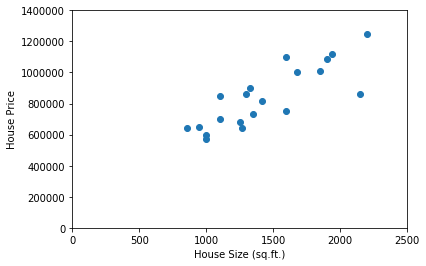

In [5]:
plt.scatter(X, Y)
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price')
plt.axis([0, 2500, 0, 1400000])
plt.show()

## Machine Learning: Linear Regression

Now we have dependent variable $Y$ and independent variable $X$. We want to start machine learning. This means we want to train a machine to learn from $X$ and to predict $Y$. In this case, the machine will form some rules $f()$ that we can use. It is written in $f()$ form because it is essentially a map that let us draw inference about $Y$ from $X$. Hence, in mathematical form
$$\hat{Y} := f(X)$$
and this $\hat{Y}$ is estimated value of $Y$.

Notice that in our case the machine is chosen to be linear regression and we can carry out standard linear regression analysis based on the machine we train. 

Also note that this is a machine learning project. We need to separate training set and testing set. This purpose is we want to be impartial and honest about the performance of the linear model on this data set. We separate data into training and testing randomly so that we can construct an environment as if there is new data set arriving for future reference.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(X_train.shape, X_test.shape)

(14, 1) (6, 1)


From above code, we separate data into training and testing. We can see that there are 16 samples for training and 4 samples for testing.

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We use *lm()* function (note this is defined from *LinearRegression()* from *sklearn* package to train our machine. Let us check out what we have.

In [9]:
print(lm.coef_, lm.intercept_)

[[482.36742232]] [161747.38505211]


We can make the following statement:
- The coefficient, $\beta_1$ of the model, is 393 from results above. This means that a unit change of House Size in sq. ft. will increase House Price by 393 dollars.
- The intercept, $\beta_0$ of the model, is not going to give us any constructive interpretation because it is at a point where House Size is 0.

## Machine Learning: Training Evaluation

We have our model trained. How well does it do on existing data? Let us introduce a metric called Root Mean Square Error (RMSE). It is a metric that measure on average how far away it is from real House Price and predicted House Price. The mathematical form is
$$RMSE := \frac{1}{n} \sum (\hat{Y} - Y)^2$$
and $\hat{Y}$ is the estimated House Price while $Y$ is the real House Price and $n$ is the sample size used for this particular experiment (in this case it is training sample size and later on we are going to use testing sample size).

In [10]:
y_train_pred = lm.predict(X_train)
RMSE_train = (((y_train_pred - y_train)**2).mean())**(0.5)
print('Training Set RMSE is', RMSE_train)

Training Set RMSE is 73567.41078099258


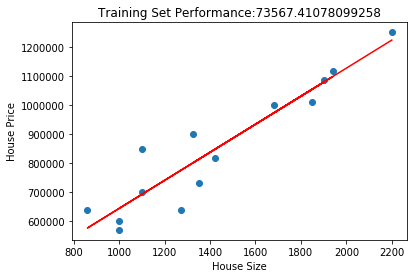

In [11]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.predict(X_train), 'r')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.title('Training Set Performance:' + str(RMSE_train))
plt.show()

This means that on average our machine (a linear model) predicts the House Price in training set with error +/- \$73k away from real prices. Considering that some houses are millions of dollars this error is actually not that bad.

## Machine Learning: Prediction

Once we have a trained model from above codes we can move forward to the next step which is prediction. If we have future observations that we like to look at, we can simply pull out the House Size in sq. ft. and use our model to predict what these houses ought to be priced at.

In [12]:
y_pred = lm.predict(X_test)
RMSE_test = (((y_pred - y_test)**2).mean())**(0.5)
print('Testing Set RMSE is', RMSE_test)

Testing Set RMSE is 177645.59979117432


We have testing set error to be over \$177k and this quite large. This means that much large error might be observed if we have more incoming data.

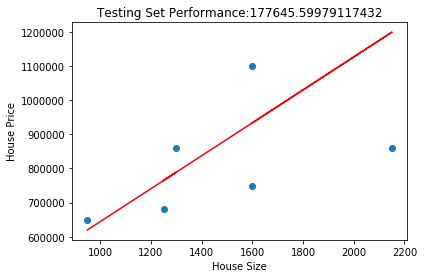

In [13]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lm.predict(X_test), 'r')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.title('Testing Set Performance:' + str(RMSE_test))
plt.show()

## Software Development / Product Management

From about analysis, we have established a list of steps we execute to carry out a simple linear regression analysis. Each step is clear written and can be examined for reference. 

Now it is time to pack everything together into a function so that the above analysis can be summarized into a word and can be pulled for future usage without having to code everything again. Once this software is developed we can get the product shipped to employers or clients and we will be starting negotiation as well as software maintainance (which is crucial for product management)

In [14]:
# Define function
def ML_SimpleLinearRegression(X, Y, test_set_size):
    # Environment Initiation
    import numpy as np
    import pandas as pd
    from scipy import stats
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    
    # Exploratory Data Analysis (EDA)
    plt.scatter(X, Y, alpha=0.3)
    plt.xlabel('House Size (sq.ft.)')
    plt.ylabel('House Price')
    plt.axis([0, 2500, 0, 1400000])
    plt.title('Explore Scatter Plot for All Sample in House Price Data')
    plt.show()
    
    # ML: Setup
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_set_size, random_state=0)
    X_train = np.array(X_train).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    
    # ML: Train
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    # ML: Training Evaluation
    y_train_pred = lm.predict(X_train)
    RMSE_train = (((y_train_pred - y_train)**2).mean())**(0.5)
    plt.scatter(X_train, y_train, alpha=0.3)
    plt.plot(X_train, lm.predict(X_train), 'r')
    plt.xlabel('House Size')
    plt.ylabel('House Price')
    plt.title('Training Set: (' + str(X_train.shape[0]) + ' samples); \nPerformance: RMSE = ' + str(RMSE_train))
    plt.show()
    
    # ML: Testing Evaluation
    y_pred = lm.predict(X_test)
    RMSE_test = (((y_pred - y_test)**2).mean())**(0.5)    
    plt.scatter(X_test, y_test, alpha=0.3)
    plt.plot(X_test, lm.predict(X_test), 'r')
    plt.xlabel('House Size')
    plt.ylabel('House Price')
    plt.title('Testing Set: (' + str(X_test.shape[0]) + ' samples); \nPerformance: RMSE = ' + str(RMSE_train))
    plt.show()

    # Generate Output
    return {
        'Data': [X, Y],
        'New Data': {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        },
        'Shapes': [X_train.shape, X_test.shape],
        'Linear Regression Results': [lm.coef_, lm.intercept_],
        'Training RMSE': RMSE_train,
        'Testing RMSE': RMSE_test
    }
# End of function

We are done! Let us run it!

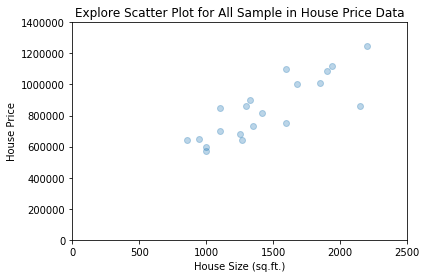

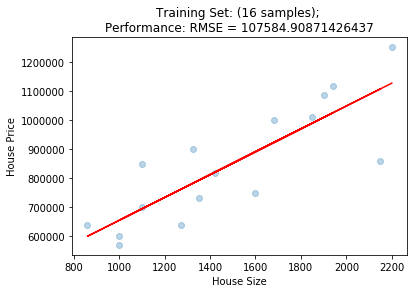

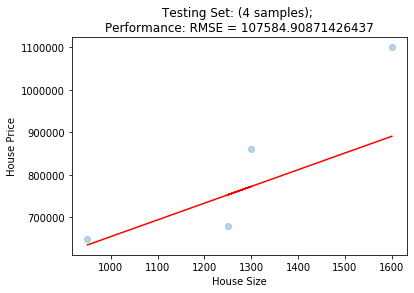

In [15]:
# Get Data
data = pd.read_excel('~/OneDrive/Documents/YinsPy/data/Housing.xlsx')
X = data['House Size (sq.ft.)']
Y = data['House Price']

# Run
testresult = ML_SimpleLinearRegression(X, Y, 0.2)

In [16]:
print('Linear Model Coefficients are:', testresult['Linear Regression Results'])
print('Training Set Error is:', testresult['Training RMSE'])
print('Testing Set Errro is:', testresult['Testing RMSE'])

Linear Model Coefficients are: [array([[393.19205365]]), array([261440.9178759])]
Training Set Error is: 107584.90871426437
Testing Set Errro is: 119431.1397260143
